<a href="https://colab.research.google.com/github/Crisosth/IA/blob/main/Doencas_cardiovasculares_MPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf

In [ ]:
# Carregando a base de dados:
df = pd.read_csv('doencas_cardiovasculares.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
# X = dados de entrada Y = classe
Y = df['target'].values
X = df.drop(columns = ['target', 'fasting blood sugar', 'exercise angina'])

In [ ]:
#normaliza os dados
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# transforma em categoria dos dados
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)

#dados de treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle = True, test_size=0.1)

In [ ]:
#Arquitetura da rede neural
def neural(X):
	model = Sequential()

	model.add(Dense(500, input_dim=X.shape[1], activation='sigmoid'))

	model.add(Dense(300, activation='sigmoid'))

	model.add(Dense(200, activation='sigmoid'))

	model.add(Dense(1, activation='sigmoid'))

	return model

model = neural(X_train)

#otimizador
adam = tf.keras.optimizers.Adam(learning_rate=0.00001)
#SGD = tf.keras.optimizers.SGD(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

history = model.fit(X_train, Y_train, epochs=500, batch_size=50, validation_split=0.2)

#teste
score = model.evaluate(X_test, Y_test)
prediction = model.predict(X_test)

#############
binarizer = Binarizer(threshold=0.50).fit(prediction)
binary = binarizer.transform(prediction)
#############
y_test = Y_test
y_pred = binary

model.summary()


Epoch 1/500
18/18 [==============================] - 2s 38ms/step - loss: 0.7255 - acc: 0.4895 - val_loss: 0.7515 - val_acc: 0.4000
Epoch 2/500
18/18 [==============================] - 0s 16ms/step - loss: 0.7110 - acc: 0.4895 - val_loss: 0.7272 - val_acc: 0.4000
Epoch 3/500
18/18 [==============================] - 0s 17ms/step - loss: 0.7008 - acc: 0.4895 - val_loss: 0.7123 - val_acc: 0.4000
Epoch 4/500
18/18 [==============================] - 0s 18ms/step - loss: 0.6963 - acc: 0.4895 - val_loss: 0.7027 - val_acc: 0.4000
Epoch 5/500
18/18 [==============================] - 0s 18ms/step - loss: 0.6941 - acc: 0.4895 - val_loss: 0.6993 - val_acc: 0.4000
Epoch 6/500
18/18 [==============================] - 0s 10ms/step - loss: 0.6932 - acc: 0.4895 - val_loss: 0.6940 - val_acc: 0.4000
Epoch 7/500
18/18 [==============================] - 0s 10ms/step - loss: 0.6924 - acc: 0.4988 - val_loss: 0.6925 - val_acc: 0.5256
Epoch 8/500
18/18 [==============================] - 0s 10ms/step - loss: 0.

In [ ]:
#saída da classificação
print("classification_report = ")
print(classification_report(y_test,y_pred))

print("confusion_matrix = ")
print(confusion_matrix(y_test,y_pred))

classification_report = 
              precision    recall  f1-score   support

           0       0.68      0.89      0.78        56
           1       0.87      0.63      0.73        63

    accuracy                           0.76       119
   macro avg       0.78      0.76      0.75       119
weighted avg       0.78      0.76      0.75       119

confusion_matrix = 
[[50  6]
 [23 40]]


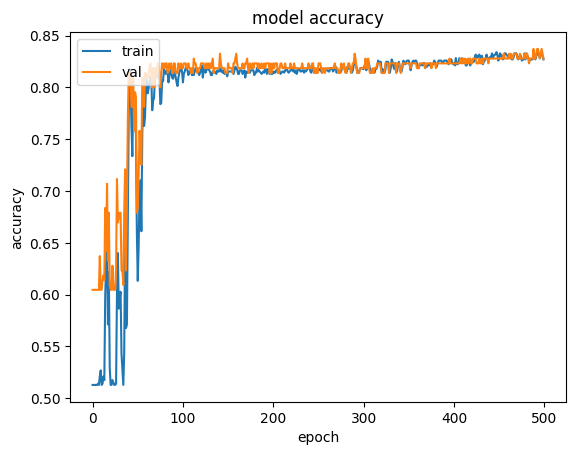

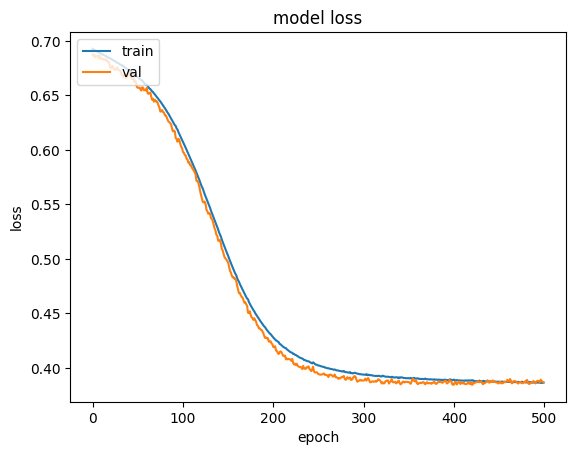

In [ ]:
#plot do treinamento e validacao
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()